<a href="https://colab.research.google.com/github/R21Rash/Regression/blob/main/Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy

In [2]:
import pandas as pd
url="https://raw.githubusercontent.com/COVID19-Malta/COVID19-Data/master/COVID-19%20Malta%20-%20Aggregate%20Data%20Set.csv"
pf =pd.read_csv(url)
pf.head(10)

,Covering dates & Week Number,Date,New Cases,Total Cases,Recovered,Deaths,Active Cases
0,NaN,06/03/2020,1,1,0,0,1
1,NaN,07/03/2020,2,3,0,0,3
2,NaN,08/03/2020,0,3,0,0,3
3,NaN,09/03/2020,1,4,0,0,4
4,NaN,10/03/2020,1,5,0,0,5
5,NaN,11/03/2020,2,7,0,0,7
6,NaN,12/03/2020,5,12,0,0,12
7,NaN,13/03/2020,1,13,1,0,12
8,NaN,14/03/2020,5,18,1,0,17
9,NaN,15/03/2020,3,21,2,0,19


Mean Squared Error: 7.139309709611019e-26


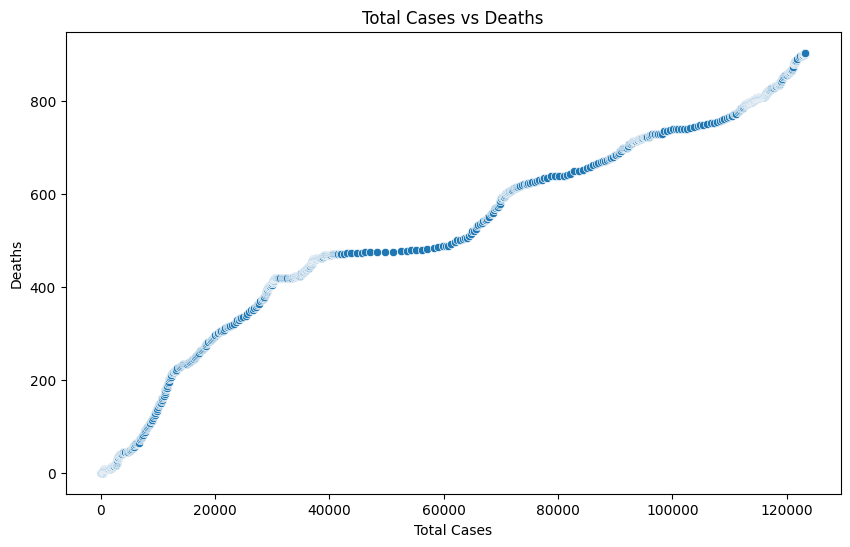

Regression Data Visualization


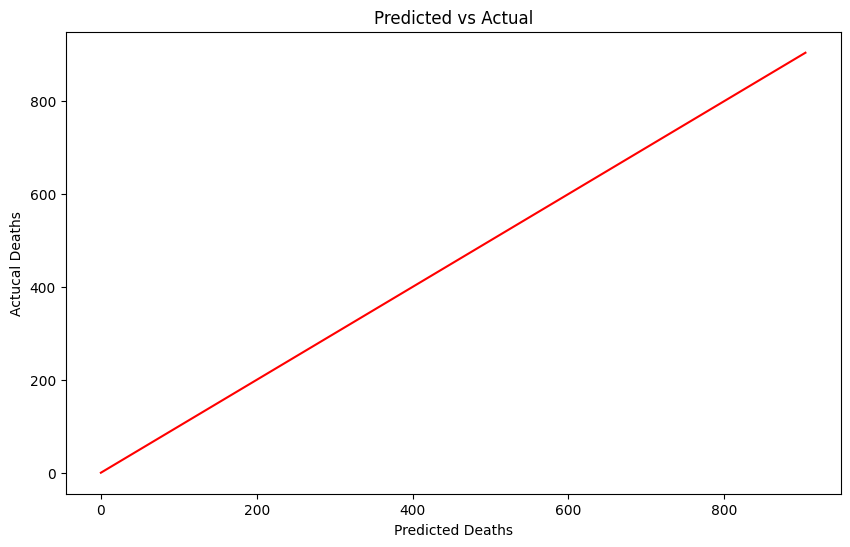

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
url="https://raw.githubusercontent.com/COVID19-Malta/COVID19-Data/master/COVID-19%20Malta%20-%20Aggregate%20Data%20Set.csv"
pf =pd.read_csv(url)

pf = pf.dropna(subset=['New Cases', 'Total Cases', 'Recovered', 'Deaths', 'Active Cases'])

# -------------------------------------------------
# Prediction(Regression).

x = pf[['New Cases', 'Total Cases', 'Recovered', 'Deaths', 'Active Cases']]
y = pf['Deaths']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# -------------------------------------------------
# Basic Data Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cases', y='Deaths', data=pf)
plt.title('Total Cases vs Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Deaths')
plt.show()

# -------------------------------------------------
# Regression Data Visualization

print("Regression Data Visualization")
plt.figure(figsize=(10, 6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Predicted vs Actual')
plt.xlabel("Predicted Deaths")
plt.ylabel('Actucal Deaths')
plt.show()
